<a href="https://colab.research.google.com/github/AJ-CE888/Ce888/blob/master/Lab_03_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import IsolationForest

# Clustering and PCA on wine Dataset

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

In [ ]:
# Get the values of the second column as a NumPy array

data = df_wine[df_wine.columns[0]].values
print('Wine Class Counts :')
print(df_wine['Class label'].value_counts())
sns.distplot(data, bins=5, kde=False, rug=True)

In [ ]:
# Fetch data into x and y variables

x=df_wine.ix[:,1:14] # Covariates or input
y=df_wine.ix[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

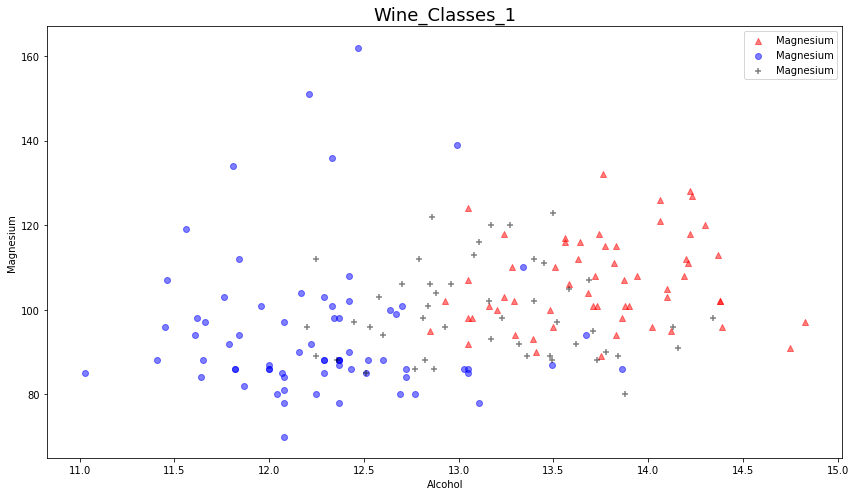

In [6]:
# Scatter plot of 3 classes of data based on True Labels with legends

fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(df_wine[df_wine['Class label'] == 1]['Alcohol'],
           df_wine[df_wine['Class label'] == 1]['Magnesium'], 
           color='red', marker='^', alpha=0.5)
ax.scatter(df_wine[df_wine['Class label'] == 2]['Alcohol'],
           df_wine[df_wine['Class label'] == 2]['Magnesium'], 
           color='blue', marker='o', alpha=0.5)
ax.scatter(df_wine[df_wine['Class label'] == 3]['Alcohol'],
           df_wine[df_wine['Class label'] == 3]['Magnesium'], 
           color='black', marker='+', alpha=0.5)

plt.title("Wine_Classes_1", fontsize=18)
plt.legend()

ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
plt.tight_layout()
plt.savefig('Wine_Classes.png', dpi=300)
plt.show()

In [ ]:
# Clustering using K Means Algorithm

km=cluster.KMeans(n_clusters=3)
km.fit(df_wine)
km.labels_

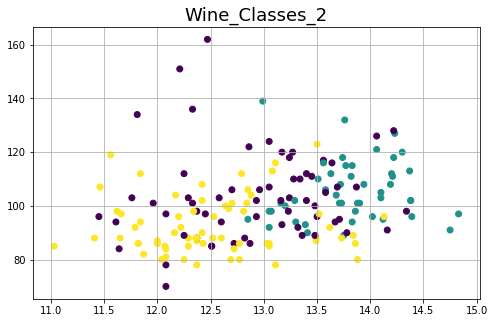

In [8]:
# Use cluster model labels to group data based on predicted classes

plt.figure(figsize=(8,5))
plt.title("Wine_Classes_2", fontsize=18)
plt.grid(True)
plt.scatter(df_wine['Alcohol'],df_wine['Magnesium'],c=km.labels_)
plt.savefig('Wine_Classes_2.png', dpi=300)
plt.show()

In [ ]:
# Splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##Dimensionality reduction: Principal component analysis using scikit-learn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

In [ ]:
# Apply PCA with n_components=2 on X_train_std data and transform test data accordingly
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_train)

In [ ]:
# Plot the first two principal components

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()


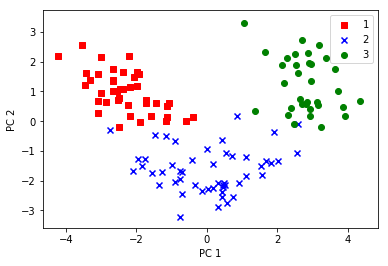

In [16]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


In [ ]:
# Apply Logistic Regression on training features and predict test features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

In [19]:
# Plot the decision region on training features and test labels using 
# the classifier trained above

plot_decision_regions(X_test_pca,y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

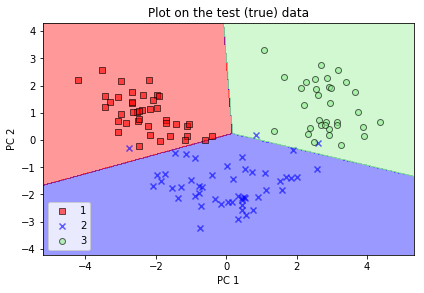

In [20]:
# Plot the decision region on test features and true labels 
# using the classifier trained above
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

In [21]:
# Plot the decision region on test features and predicted labels 
# using the classifier trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()